http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [43]:
dates = pd.date_range('20130101', periods=6)

In [44]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
dates = pd.date_range('20210701', periods=6)

In [7]:
dates

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06'],
              dtype='datetime64[ns]', freq='D')

In [45]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [46]:
df

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-05 -1.461940  0.057336 -0.185631  0.479660
2013-01-06  1.646904 -1.270340 -1.368504  1.149782

Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [35]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [36]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [37]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [13]:
df2.<Tab>

SyntaxError: invalid syntax (<ipython-input-13-915637deb483>, line 1)

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [47]:
df

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-05 -1.461940  0.057336 -0.185631  0.479660
2013-01-06  1.646904 -1.270340 -1.368504  1.149782

In [48]:
df.head()

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-05 -1.461940  0.057336 -0.185631  0.479660

In [49]:
df.tail(3)

A         B         C         D
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-05 -1.461940  0.057336 -0.185631  0.479660
2013-01-06  1.646904 -1.270340 -1.368504  1.149782

Display the index, columns, and the underlying numpy data

In [50]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [51]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [52]:
df.values

array([[ 0.90571332,  1.5197001 ,  2.22893696, -0.83582619],
       [ 0.08858428,  0.1980745 ,  0.58543577,  0.90874386],
       [ 0.29370618,  0.7242919 , -0.54300428,  1.42894799],
       [-0.77758589,  0.13026024, -0.72017757,  1.8553666 ],
       [-1.46193987,  0.05733584, -0.18563108,  0.47965975],
       [ 1.64690403, -1.27034044, -1.36850393,  1.14978243]])

Describe shows a quick statistic summary of your data

In [53]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.115897  0.226554 -0.000491  0.831112
std    1.121431  0.916448  1.267412  0.939817
min   -1.461940 -1.270340 -1.368504 -0.835826
25%   -0.561043  0.075567 -0.675884  0.586931
50%    0.191145  0.164167 -0.364318  1.029263
75%    0.752712  0.592738  0.392669  1.359157
max    1.646904  1.519700  2.228937  1.855367

Transposing your data

In [54]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    0.905713    0.088584    0.293706   -0.777586   -1.461940    1.646904
B    1.519700    0.198074    0.724292    0.130260    0.057336   -1.270340
C    2.228937    0.585436   -0.543004   -0.720178   -0.185631   -1.368504
D   -0.835826    0.908744    1.428948    1.855367    0.479660    1.149782

Sorting by an axis

In [55]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01 -0.835826  2.228937  1.519700  0.905713
2013-01-02  0.908744  0.585436  0.198074  0.088584
2013-01-03  1.428948 -0.543004  0.724292  0.293706
2013-01-04  1.855367 -0.720178  0.130260 -0.777586
2013-01-05  0.479660 -0.185631  0.057336 -1.461940
2013-01-06  1.149782 -1.368504 -1.270340  1.646904

Sorting by value

In [56]:
df.sort_values(by='B')

A         B         C         D
2013-01-06  1.646904 -1.270340 -1.368504  1.149782
2013-01-05 -1.461940  0.057336 -0.185631  0.479660
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-01  0.905713  1.519700  2.228937 -0.835826

## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [57]:
df

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-05 -1.461940  0.057336 -0.185631  0.479660
2013-01-06  1.646904 -1.270340 -1.368504  1.149782

In [59]:
df.A

2013-01-01    0.905713
2013-01-02    0.088584
2013-01-03    0.293706
2013-01-04   -0.777586
2013-01-05   -1.461940
2013-01-06    1.646904
Freq: D, Name: A, dtype: float64

In [58]:
df['A']

2013-01-01    0.905713
2013-01-02    0.088584
2013-01-03    0.293706
2013-01-04   -0.777586
2013-01-05   -1.461940
2013-01-06    1.646904
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [63]:
df[0:3]

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948

In [64]:
df['20130102':'20130104']

A         B         C         D
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-04 -0.777586  0.130260 -0.720178  1.855367

### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [65]:
df.loc[dates[0]]

A    0.905713
B    1.519700
C    2.228937
D   -0.835826
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [66]:
df.loc[:,['A','B']]

A         B
2013-01-01  0.905713  1.519700
2013-01-02  0.088584  0.198074
2013-01-03  0.293706  0.724292
2013-01-04 -0.777586  0.130260
2013-01-05 -1.461940  0.057336
2013-01-06  1.646904 -1.270340

Showing label slicing, both endpoints are included

In [67]:
df.loc['20130102':'20130104',['A','B']]

A         B
2013-01-02  0.088584  0.198074
2013-01-03  0.293706  0.724292
2013-01-04 -0.777586  0.130260

Reduction in the dimensions of the returned object

In [68]:
df.loc['20130102',['A','B']]

A    0.088584
B    0.198074
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [69]:
df.loc[dates[0],'A']

0.9057133224031517

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [70]:
df.iloc[3]

A   -0.777586
B    0.130260
C   -0.720178
D    1.855367
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [71]:
df.iloc[3:5,0:2]

A         B
2013-01-04 -0.777586  0.130260
2013-01-05 -1.461940  0.057336

By lists of integer position locations, similar to the numpy/python style

In [72]:
df.iloc[[1,2,4],[0,2]]

A         C
2013-01-02  0.088584  0.585436
2013-01-03  0.293706 -0.543004
2013-01-05 -1.461940 -0.185631

For slicing rows explicitly

In [73]:
df.iloc[1:3,:]

A         B         C         D
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948

For slicing columns explicitly

In [74]:
df.iloc[:,1:3]

B         C
2013-01-01  1.519700  2.228937
2013-01-02  0.198074  0.585436
2013-01-03  0.724292 -0.543004
2013-01-04  0.130260 -0.720178
2013-01-05  0.057336 -0.185631
2013-01-06 -1.270340 -1.368504

For getting a value explicitly

In [75]:
df.iloc[1,1]

0.19807449691848422

For getting fast access to a scalar (equiv to the prior method)

In [76]:
df.iat[1,1]

0.19807449691848422

## Boolean Indexing

Using a single column’s values to select data.

In [78]:
df.A > 0

2013-01-01     True
2013-01-02     True
2013-01-03     True
2013-01-04    False
2013-01-05    False
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [77]:
df[df.A > 0]

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-06  1.646904 -1.270340 -1.368504  1.149782

A where operation for getting.

In [80]:
df > 0

A      B      C      D
2013-01-01   True   True   True  False
2013-01-02   True   True   True   True
2013-01-03   True   True  False   True
2013-01-04  False   True  False   True
2013-01-05  False   True  False   True
2013-01-06   True  False  False   True

In [81]:
df[df > 0]

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937       NaN
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292       NaN  1.428948
2013-01-04       NaN  0.130260       NaN  1.855367
2013-01-05       NaN  0.057336       NaN  0.479660
2013-01-06  1.646904       NaN       NaN  1.149782

Using the isin() method for filtering:

In [82]:
df2 = df.copy()

In [83]:
df2['E'] = ['one','one', 'two','three','four','three']

In [84]:
df2

A         B         C         D      E
2013-01-01  0.905713  1.519700  2.228937 -0.835826    one
2013-01-02  0.088584  0.198074  0.585436  0.908744    one
2013-01-03  0.293706  0.724292 -0.543004  1.428948    two
2013-01-04 -0.777586  0.130260 -0.720178  1.855367  three
2013-01-05 -1.461940  0.057336 -0.185631  0.479660   four
2013-01-06  1.646904 -1.270340 -1.368504  1.149782  three

In [85]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [86]:
df2[df2['E'].isin(['two','four'])]

A         B         C         D     E
2013-01-03  0.293706  0.724292 -0.543004  1.428948   two
2013-01-05 -1.461940  0.057336 -0.185631  0.479660  four

## Setting

Setting a new column automatically aligns the data by the indexes

In [88]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [89]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [90]:
df

A         B         C         D
2013-01-01  0.905713  1.519700  2.228937 -0.835826
2013-01-02  0.088584  0.198074  0.585436  0.908744
2013-01-03  0.293706  0.724292 -0.543004  1.428948
2013-01-04 -0.777586  0.130260 -0.720178  1.855367
2013-01-05 -1.461940  0.057336 -0.185631  0.479660
2013-01-06  1.646904 -1.270340 -1.368504  1.149782

In [92]:
df['F'] = s1
df

A         B         C         D    F
2013-01-01  0.905713  1.519700  2.228937 -0.835826  NaN
2013-01-02  0.088584  0.198074  0.585436  0.908744  1.0
2013-01-03  0.293706  0.724292 -0.543004  1.428948  2.0
2013-01-04 -0.777586  0.130260 -0.720178  1.855367  3.0
2013-01-05 -1.461940  0.057336 -0.185631  0.479660  4.0
2013-01-06  1.646904 -1.270340 -1.368504  1.149782  5.0

Setting values by label

In [93]:
df.at[dates[0],'A'] = 0
df

A         B         C         D    F
2013-01-01  0.000000  1.519700  2.228937 -0.835826  NaN
2013-01-02  0.088584  0.198074  0.585436  0.908744  1.0
2013-01-03  0.293706  0.724292 -0.543004  1.428948  2.0
2013-01-04 -0.777586  0.130260 -0.720178  1.855367  3.0
2013-01-05 -1.461940  0.057336 -0.185631  0.479660  4.0
2013-01-06  1.646904 -1.270340 -1.368504  1.149782  5.0

Settomg values by position

In [94]:
df.iat[0,1] = 0
df

A         B         C         D    F
2013-01-01  0.000000  0.000000  2.228937 -0.835826  NaN
2013-01-02  0.088584  0.198074  0.585436  0.908744  1.0
2013-01-03  0.293706  0.724292 -0.543004  1.428948  2.0
2013-01-04 -0.777586  0.130260 -0.720178  1.855367  3.0
2013-01-05 -1.461940  0.057336 -0.185631  0.479660  4.0
2013-01-06  1.646904 -1.270340 -1.368504  1.149782  5.0

Setting by assigning with a numpy array

In [95]:
df.loc[:,'D'] = np.array([5] * len(df))
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

The result of the prior setting operations

In [96]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

A where operation with setting.

In [98]:
df2 = df.copy()
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

In [100]:
df2[df2 > 0] = -df2
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -2.228937 -5  NaN
2013-01-02 -0.088584 -0.198074 -0.585436 -5 -1.0
2013-01-03 -0.293706 -0.724292 -0.543004 -5 -2.0
2013-01-04 -0.777586 -0.130260 -0.720178 -5 -3.0
2013-01-05 -1.461940 -0.057336 -0.185631 -5 -4.0
2013-01-06 -1.646904 -1.270340 -1.368504 -5 -5.0

In [101]:
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -2.228937 -5  NaN
2013-01-02 -0.088584 -0.198074 -0.585436 -5 -1.0
2013-01-03 -0.293706 -0.724292 -0.543004 -5 -2.0
2013-01-04 -0.777586 -0.130260 -0.720178 -5 -3.0
2013-01-05 -1.461940 -0.057336 -0.185631 -5 -4.0
2013-01-06 -1.646904 -1.270340 -1.368504 -5 -5.0

## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [102]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

In [103]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

A         B         C  D    F   E
2013-01-01  0.000000  0.000000  2.228937  5  NaN NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0 NaN
2013-01-03  0.293706  0.724292 -0.543004  5  2.0 NaN
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0 NaN

In [104]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [105]:
df1

A         B         C  D    F    E
2013-01-01  0.000000  0.000000  2.228937  5  NaN  1.0
2013-01-02  0.088584  0.198074  0.585436  5  1.0  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0  NaN
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0  NaN

To drop any rows that have missing data.

In [107]:
df1.dropna(how='any')

A         B         C  D    F    E
2013-01-02  0.088584  0.198074  0.585436  5  1.0  1.0

Filling missing data

In [108]:
df1.fillna(value=5)

A         B         C  D    F    E
2013-01-01  0.000000  0.000000  2.228937  5  5.0  1.0
2013-01-02  0.088584  0.198074  0.585436  5  1.0  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0  5.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0  5.0

To get the boolean mask where values are nan

In [109]:
pd.isnull(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [110]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

In [113]:
df.mean()

A   -0.035055
B   -0.026730
C   -0.000491
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [114]:
df.mean(1)

2013-01-01    1.807234
2013-01-02    1.374419
2013-01-03    1.494999
2013-01-04    1.326499
2013-01-05    1.481953
2013-01-06    1.801612
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [116]:
pd.Series([1,3,5,np.nan,6,8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [117]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [118]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [119]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

In [120]:
df.sub(s, axis='index')

A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.706294 -0.275708 -1.543004  4.0  1.0
2013-01-04 -3.777586 -2.869740 -3.720178  2.0  0.0
2013-01-05 -6.461940 -4.942664 -5.185631  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

### Apply

Applying functions to the data

In [121]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  2.228937  5  NaN
2013-01-02  0.088584  0.198074  0.585436  5  1.0
2013-01-03  0.293706  0.724292 -0.543004  5  2.0
2013-01-04 -0.777586  0.130260 -0.720178  5  3.0
2013-01-05 -1.461940  0.057336 -0.185631  5  4.0
2013-01-06  1.646904 -1.270340 -1.368504  5  5.0

In [122]:
df.apply(np.cumsum)

A         B         C   D     F
2013-01-01  0.000000  0.000000  2.228937   5   NaN
2013-01-02  0.088584  0.198074  2.814373  10   1.0
2013-01-03  0.382290  0.922366  2.271368  15   3.0
2013-01-04 -0.395295  1.052627  1.551191  20   6.0
2013-01-05 -1.857235  1.109962  1.365560  25  10.0
2013-01-06 -0.210331 -0.160378 -0.002944  30  15.0

In [123]:
df.apply(lambda x: x.max() - x.min())

A    3.108844
B    1.994632
C    3.597441
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [129]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [130]:
s

0    5
1    6
2    4
3    3
4    2
5    4
6    1
7    2
8    0
9    5
dtype: int32

In [131]:
s.value_counts()

5    2
4    2
2    2
6    1
3    1
1    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [133]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [134]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [135]:
df = pd.DataFrame(np.random.randn(10, 4))

In [79]:
df

0         1         2         3
0  1.873665 -1.722887 -0.256806 -1.797248
1  0.365456 -0.099333  1.639359 -0.442498
2 -1.229114  0.271340 -0.066477 -1.393025
3  1.332135 -0.688096 -0.978599 -0.344103
4 -0.257008  1.756029 -1.011115 -0.729116
5 -0.006170  0.093916  2.388943  1.299322
6 -0.474888 -1.016843  1.345600 -0.892818
7  0.676251  0.359587 -0.302906 -0.703389
8 -0.169504 -0.297141 -1.051288  0.885155
9 -1.813599  0.028527  0.393014  0.573650

In [136]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.267987 -0.227655 -2.584489 -0.875845
 1 -0.784638 -0.085196 -0.176936 -0.271971
 2  0.055465 -0.817095 -0.669399 -0.559235,
           0         1         2         3
 3  0.317379  0.091363 -0.649481 -0.759272
 4  0.560125 -0.775490 -0.300942  0.793963
 5 -0.043172 -0.411232  0.064215 -0.942423
 6 -0.071912  0.625055 -1.303896  0.025474,
           0         1         2         3
 7 -0.643317  0.204108 -1.257661  1.086961
 8 -0.014983  0.258562  0.538951 -0.021944
 9 -0.659205  0.305930  0.557392 -0.292997]

In [137]:
pd.concat(pieces)

0         1         2         3
0  0.267987 -0.227655 -2.584489 -0.875845
1 -0.784638 -0.085196 -0.176936 -0.271971
2  0.055465 -0.817095 -0.669399 -0.559235
3  0.317379  0.091363 -0.649481 -0.759272
4  0.560125 -0.775490 -0.300942  0.793963
5 -0.043172 -0.411232  0.064215 -0.942423
6 -0.071912  0.625055 -1.303896  0.025474
7 -0.643317  0.204108 -1.257661  1.086961
8 -0.014983  0.258562  0.538951 -0.021944
9 -0.659205  0.305930  0.557392 -0.292997

### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [138]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

key  lval
0  foo     1
1  foo     2

In [139]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

key  rval
0  foo     4
1  foo     5

In [140]:
left

key  lval
0  foo     1
1  foo     2

In [141]:
right

key  rval
0  foo     4
1  foo     5

In [0]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

In [142]:
pd.merge(left, right)

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [143]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [144]:
df

A         B         C         D
0  1.148037 -1.992337 -0.647712  0.369901
1  0.396889 -1.158207 -0.326639 -0.809136
2  1.940599 -1.398549  2.721986  0.561473
3 -0.197324  0.458251  2.301597  0.123195
4 -0.074633 -1.095839  1.204219 -0.646883
5  0.623673  0.465849 -1.176574 -0.867977
6 -1.212256 -1.402564 -0.593633 -0.535316
7 -0.377181 -0.052463  2.318953 -1.051771

In [145]:
s = df.iloc[3]
s

A   -0.197324
B    0.458251
C    2.301597
D    0.123195
Name: 3, dtype: float64

In [146]:
df.append(s, ignore_index=True)

A         B         C         D
0  1.148037 -1.992337 -0.647712  0.369901
1  0.396889 -1.158207 -0.326639 -0.809136
2  1.940599 -1.398549  2.721986  0.561473
3 -0.197324  0.458251  2.301597  0.123195
4 -0.074633 -1.095839  1.204219 -0.646883
5  0.623673  0.465849 -1.176574 -0.867977
6 -1.212256 -1.402564 -0.593633 -0.535316
7 -0.377181 -0.052463  2.318953 -1.051771
8 -0.197324  0.458251  2.301597  0.123195

## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [147]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [149]:
df

A      B         C         D
0  foo    one  0.074542 -0.653319
1  bar    one  0.692750  0.164923
2  foo    two -1.176411  0.336641
3  bar  three  1.204483 -0.172520
4  foo    two -0.466865  0.331802
5  bar    two -1.367554 -1.080221
6  foo    one  1.863438 -0.893459
7  foo  three  0.224849  0.068475

Grouping and then applying a function sum to the resulting groups.

In [150]:
df.groupby('A').sum()

C         D
A                      
bar  0.529680 -1.087818
foo  0.519553 -0.809859

In [151]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.692750  0.164923
    three  1.204483 -0.172520
    two   -1.367554 -1.080221
foo one    1.937980 -1.546778
    three  0.224849  0.068475
    two   -1.643276  0.668444

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [153]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [154]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [155]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.456859  0.061631
      two     0.610516 -0.341625
baz   one     0.711181  0.428836
      two    -1.283002  0.472152
foo   one    -0.159351  0.200881
      two     0.883428  1.988388
qux   one     0.888836 -0.760525
      two    -0.684214 -0.796973

In [156]:
df2 = df[:4]

In [99]:
df2

A         B
first second                    
bar   one     0.017670  0.030313
      two     0.843842  0.646647
baz   one     2.822098  1.724391
      two    -0.314881  0.148966

The stack() method “compresses” a level in the DataFrame’s columns.

In [157]:
stacked = df2.stack()

In [158]:
stacked

first  second   
bar    one     A   -0.456859
               B    0.061631
       two     A    0.610516
               B   -0.341625
baz    one     A    0.711181
               B    0.428836
       two     A   -1.283002
               B    0.472152
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [159]:
stacked.unstack()

A         B
first second                    
bar   one    -0.456859  0.061631
      two     0.610516 -0.341625
baz   one     0.711181  0.428836
      two    -1.283002  0.472152

In [163]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.456859  0.711181
       B  0.061631  0.428836
two    A  0.610516 -1.283002
       B -0.341625  0.472152

In [164]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.456859  0.610516
      B  0.061631 -0.341625
baz   A  0.711181 -1.283002
      B  0.428836  0.472152

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [165]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [166]:
df

A  B    C         D         E
0     one  A  foo  0.943635 -0.634259
1     one  B  foo  0.951615  0.273266
2     two  C  foo  0.302962  1.429207
3   three  A  bar -0.137735 -0.077114
4     one  B  bar  0.412160  1.056322
5     one  C  bar  0.640730 -1.279577
6     two  A  foo  0.419190  1.197236
7   three  B  foo -0.572947  1.314279
8     one  C  foo  1.726545  0.275470
9     one  A  bar -0.604470  1.879789
10    two  B  bar -0.137762  0.627208
11  three  C  bar -0.677837  0.933894

We can produce pivot tables from this data very easily:

In [167]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.604470  0.943635
      B  0.412160  0.951615
      C  0.640730  1.726545
three A -0.137735       NaN
      B       NaN -0.572947
      C -0.677837       NaN
two   A       NaN  0.419190
      B -0.137762       NaN
      C       NaN  0.302962

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [169]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [171]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     23
2012-01-01 00:00:01    344
2012-01-01 00:00:02    344
2012-01-01 00:00:03    348
2012-01-01 00:00:04    211
                      ... 
2012-01-01 00:01:35     87
2012-01-01 00:01:36    314
2012-01-01 00:01:37    382
2012-01-01 00:01:38    356
2012-01-01 00:01:39     57
Freq: S, Length: 100, dtype: int32

In [174]:
ts.resample('5Min').sum()

2012-01-01    24847
Freq: 5T, dtype: int32

In [172]:
ts.sum()

24847

In [184]:
rng21 = pd.date_range('1/1/2021', periods=100, freq='1min')
rng21

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:01:00',
               '2021-01-01 00:02:00', '2021-01-01 00:03:00',
               '2021-01-01 00:04:00', '2021-01-01 00:05:00',
               '2021-01-01 00:06:00', '2021-01-01 00:07:00',
               '2021-01-01 00:08:00', '2021-01-01 00:09:00',
               '2021-01-01 00:10:00', '2021-01-01 00:11:00',
               '2021-01-01 00:12:00', '2021-01-01 00:13:00',
               '2021-01-01 00:14:00', '2021-01-01 00:15:00',
               '2021-01-01 00:16:00', '2021-01-01 00:17:00',
               '2021-01-01 00:18:00', '2021-01-01 00:19:00',
               '2021-01-01 00:20:00', '2021-01-01 00:21:00',
               '2021-01-01 00:22:00', '2021-01-01 00:23:00',
               '2021-01-01 00:24:00', '2021-01-01 00:25:00',
               '2021-01-01 00:26:00', '2021-01-01 00:27:00',
               '2021-01-01 00:28:00', '2021-01-01 00:29:00',
               '2021-01-01 00:30:00', '2021-01-01 00:31:00',
               '2021-01-

In [185]:
ts = pd.Series(np.random.randint(0, 500, len(rng21)), index=rng21)
ts

2021-01-01 00:00:00    241
2021-01-01 00:01:00     10
2021-01-01 00:02:00    254
2021-01-01 00:03:00     34
2021-01-01 00:04:00     69
                      ... 
2021-01-01 01:35:00    241
2021-01-01 01:36:00    101
2021-01-01 01:37:00    451
2021-01-01 01:38:00    132
2021-01-01 01:39:00    134
Freq: T, Length: 100, dtype: int32

In [188]:
ts.resample('5Min').sum().sum()

24245

In [187]:
ts.sum()

24245

Time zone representation

In [190]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [191]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [192]:
ts

2012-03-06   -0.179628
2012-03-07    2.290569
2012-03-08    1.142157
2012-03-09   -0.662146
2012-03-10    1.308062
Freq: D, dtype: float64

In [193]:
ts_utc = ts.tz_localize('UTC')

In [194]:
ts_utc

2012-03-06 00:00:00+00:00   -0.179628
2012-03-07 00:00:00+00:00    2.290569
2012-03-08 00:00:00+00:00    1.142157
2012-03-09 00:00:00+00:00   -0.662146
2012-03-10 00:00:00+00:00    1.308062
Freq: D, dtype: float64


Convert to another time zone

In [195]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.179628
2012-03-06 19:00:00-05:00    2.290569
2012-03-07 19:00:00-05:00    1.142157
2012-03-08 19:00:00-05:00   -0.662146
2012-03-09 19:00:00-05:00    1.308062
Freq: D, dtype: float64


Converting between time span representations

In [197]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [198]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [199]:
ts

2012-01-31   -0.856114
2012-02-29   -0.250954
2012-03-31    1.637586
2012-04-30    1.202598
2012-05-31    0.433317
Freq: M, dtype: float64

In [200]:
ps = ts.to_period()

In [201]:
ps

2012-01   -0.856114
2012-02   -0.250954
2012-03    1.637586
2012-04    1.202598
2012-05    0.433317
Freq: M, dtype: float64

In [202]:
ps.to_timestamp()

2012-01-01   -0.856114
2012-02-01   -0.250954
2012-03-01    1.637586
2012-04-01    1.202598
2012-05-01    0.433317
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [123]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [124]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [125]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [126]:
ts.head()

1990-03-01 09:00   -0.367600
1990-06-01 09:00    0.580880
1990-09-01 09:00   -0.279048
1990-12-01 09:00    1.263490
1991-03-01 09:00   -0.749094
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [128]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

Convert the raw grades to a categorical data type.

In [0]:
df["grade"] = df["raw_grade"].astype("category")

In [0]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [0]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [0]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [0]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [0]:
df.sort_values(by="grade")

id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

Grouping by a categorical column shows also empty categories.

In [0]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [0]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [0]:
ts = ts.cumsum()

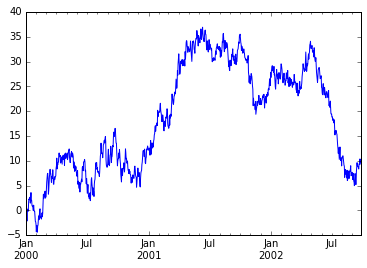

In [0]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [0]:
df = df.cumsum()

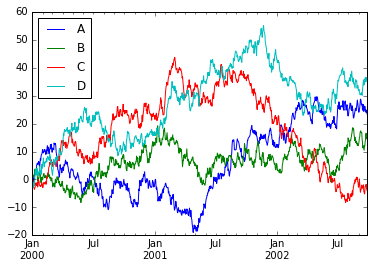

In [0]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [0]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [0]:
pd.read_csv('foo.csv')

Unnamed: 0          A          B         C          D
0    2000-01-01  -0.067377  -0.035638 -0.021100  -0.752226
1    2000-01-02  -0.341526   0.867899  0.147792  -2.190171
2    2000-01-03  -0.118822   1.501776 -0.472641  -1.448117
3    2000-01-04  -0.727838   0.889072 -2.704155  -2.934499
4    2000-01-05   0.531075   1.073829 -2.847804  -2.517378
5    2000-01-06   0.091479   1.478376 -3.029743  -0.906359
6    2000-01-07   1.492265   2.113159 -3.549888  -2.117010
7    2000-01-08   1.851265   2.703705 -3.141079   0.079449
8    2000-01-09   2.213547   3.685811 -3.029953   1.620792
9    2000-01-10   2.028055   2.034899 -2.115068   3.566303
10   2000-01-11   2.562459   1.562458 -1.266220   3.125902
11   2000-01-12   3.563649   2.535037 -1.609729   1.636481
12   2000-01-13   3.723012   3.932004 -1.801761   3.817881
13   2000-01-14   5.097816   4.143041 -2.183664   2.784085
14   2000-01-15   5.415682   2.042796 -1.186153   3.828601
15   2000-01-16   5.875182   0.968725 -1.122289   3.771920
16   2000-01-17   5.352968  -0.637527 -2.741543   2.230048
17   2000-01-18   5.403275   0.561341 -1.943048   1.291451
18   2000-01-19   5.898989   0.260370  0.010189   2.686019
19   2000-01-20   6.446354   0.214986 -0.621627   2.265080
20   2000-01-21   6.093474   0.696028 -0.604788   2.150748
21   2000-01-22   4.816564   2.795033 -1.992706   2.617393
22   2000-01-23   4.484142   2.215204 -2.216621   4.585891
23   2000-01-24   6.218927   2.262602 -2.310701   3.788079
24   2000-01-25   7.490060   1.679666 -2.538864   2.202103
25   2000-01-26   6.878468   0.292143 -2.203920   3.033513
26   2000-01-27   8.265415  -1.160655 -2.457205   1.806101
27   2000-01-28   8.800961   0.506590 -1.682888   2.444211
28   2000-01-29   9.069957   0.362689 -1.158481   5.313443
29   2000-01-30   9.342882   0.817050 -1.591316   3.924335
..          ...        ...        ...       ...        ...
970  2002-08-28  28.436666  12.185562  0.713590  33.470501
971  2002-08-29  27.263426  12.515911 -0.883309  33.574743
972  2002-08-30  26.365767  12.070123 -1.070257  33.533270
973  2002-08-31  24.797556  12.432728 -2.800671  31.792798
974  2002-09-01  24.063454  12.938684 -2.392343  31.930125
975  2002-09-02  24.246746  13.716965 -1.796432  32.215315
976  2002-09-03  25.025802  15.046681  0.176345  31.351909
977  2002-09-04  25.722266  15.208363 -2.028918  30.888133
978  2002-09-05  27.017412  16.800099 -3.470389  30.260138
979  2002-09-06  28.739792  17.267548 -4.587964  30.492176
980  2002-09-07  28.691180  17.406774 -3.824464  30.611210
981  2002-09-08  28.051428  16.879897 -3.696306  30.545629
982  2002-09-09  26.684984  16.739758 -2.998523  31.096066
983  2002-09-10  26.921334  16.768293 -2.056697  30.499331
984  2002-09-11  27.003199  14.581637 -2.688241  30.131872
985  2002-09-12  25.007810  13.499850 -3.161634  32.054496
986  2002-09-13  24.787813  11.329320 -2.826720  33.077085
987  2002-09-14  26.903225  12.068355 -2.648789  34.210246
988  2002-09-15  25.777238  11.535393 -1.952559  35.667764
989  2002-09-16  24.381155  10.885129 -4.349392  33.810491
990  2002-09-17  24.914723  10.461896 -4.523927  33.943282
991  2002-09-18  25.144380  12.115287 -5.210419  34.402361
992  2002-09-19  26.253174  11.910041 -4.889495  36.015240
993  2002-09-20  25.736717  13.275022 -2.518543  35.721396
994  2002-09-21  24.350343  14.154565 -2.495837  36.593416
995  2002-09-22  25.003458  16.235255 -2.376958  34.964767
996  2002-09-23  23.977122  16.555848 -1.746319  35.222469
997  2002-09-24  24.738345  14.692118 -3.112445  36.535400
998  2002-09-25  23.977210  14.979042 -3.557790  36.189400
999  2002-09-26  23.442975  14.431692 -4.008666  35.876610

[1000 rows x 5 columns]

### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [0]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [0]:
pd.read_hdf('foo.h5','df')

A          B         C          D
2000-01-01  -0.067377  -0.035638 -0.021100  -0.752226
2000-01-02  -0.341526   0.867899  0.147792  -2.190171
2000-01-03  -0.118822   1.501776 -0.472641  -1.448117
2000-01-04  -0.727838   0.889072 -2.704155  -2.934499
2000-01-05   0.531075   1.073829 -2.847804  -2.517378
2000-01-06   0.091479   1.478376 -3.029743  -0.906359
2000-01-07   1.492265   2.113159 -3.549888  -2.117010
2000-01-08   1.851265   2.703705 -3.141079   0.079449
2000-01-09   2.213547   3.685811 -3.029953   1.620792
2000-01-10   2.028055   2.034899 -2.115068   3.566303
2000-01-11   2.562459   1.562458 -1.266220   3.125902
2000-01-12   3.563649   2.535037 -1.609729   1.636481
2000-01-13   3.723012   3.932004 -1.801761   3.817881
2000-01-14   5.097816   4.143041 -2.183664   2.784085
2000-01-15   5.415682   2.042796 -1.186153   3.828601
2000-01-16   5.875182   0.968725 -1.122289   3.771920
2000-01-17   5.352968  -0.637527 -2.741543   2.230048
2000-01-18   5.403275   0.561341 -1.943048   1.291451
2000-01-19   5.898989   0.260370  0.010189   2.686019
2000-01-20   6.446354   0.214986 -0.621627   2.265080
2000-01-21   6.093474   0.696028 -0.604788   2.150748
2000-01-22   4.816564   2.795033 -1.992706   2.617393
2000-01-23   4.484142   2.215204 -2.216621   4.585891
2000-01-24   6.218927   2.262602 -2.310701   3.788079
2000-01-25   7.490060   1.679666 -2.538864   2.202103
2000-01-26   6.878468   0.292143 -2.203920   3.033513
2000-01-27   8.265415  -1.160655 -2.457205   1.806101
2000-01-28   8.800961   0.506590 -1.682888   2.444211
2000-01-29   9.069957   0.362689 -1.158481   5.313443
2000-01-30   9.342882   0.817050 -1.591316   3.924335
...               ...        ...       ...        ...
2002-08-28  28.436666  12.185562  0.713590  33.470501
2002-08-29  27.263426  12.515911 -0.883309  33.574743
2002-08-30  26.365767  12.070123 -1.070257  33.533270
2002-08-31  24.797556  12.432728 -2.800671  31.792798
2002-09-01  24.063454  12.938684 -2.392343  31.930125
2002-09-02  24.246746  13.716965 -1.796432  32.215315
2002-09-03  25.025802  15.046681  0.176345  31.351909
2002-09-04  25.722266  15.208363 -2.028918  30.888133
2002-09-05  27.017412  16.800099 -3.470389  30.260138
2002-09-06  28.739792  17.267548 -4.587964  30.492176
2002-09-07  28.691180  17.406774 -3.824464  30.611210
2002-09-08  28.051428  16.879897 -3.696306  30.545629
2002-09-09  26.684984  16.739758 -2.998523  31.096066
2002-09-10  26.921334  16.768293 -2.056697  30.499331
2002-09-11  27.003199  14.581637 -2.688241  30.131872
2002-09-12  25.007810  13.499850 -3.161634  32.054496
2002-09-13  24.787813  11.329320 -2.826720  33.077085
2002-09-14  26.903225  12.068355 -2.648789  34.210246
2002-09-15  25.777238  11.535393 -1.952559  35.667764
2002-09-16  24.381155  10.885129 -4.349392  33.810491
2002-09-17  24.914723  10.461896 -4.523927  33.943282
2002-09-18  25.144380  12.115287 -5.210419  34.402361
2002-09-19  26.253174  11.910041 -4.889495  36.015240
2002-09-20  25.736717  13.275022 -2.518543  35.721396
2002-09-21  24.350343  14.154565 -2.495837  36.593416
2002-09-22  25.003458  16.235255 -2.376958  34.964767
2002-09-23  23.977122  16.555848 -1.746319  35.222469
2002-09-24  24.738345  14.692118 -3.112445  36.535400
2002-09-25  23.977210  14.979042 -3.557790  36.189400
2002-09-26  23.442975  14.431692 -4.008666  35.876610

[1000 rows x 4 columns]

### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [0]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [0]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

A          B         C          D
2000-01-01  -0.067377  -0.035638 -0.021100  -0.752226
2000-01-02  -0.341526   0.867899  0.147792  -2.190171
2000-01-03  -0.118822   1.501776 -0.472641  -1.448117
2000-01-04  -0.727838   0.889072 -2.704155  -2.934499
2000-01-05   0.531075   1.073829 -2.847804  -2.517378
2000-01-06   0.091479   1.478376 -3.029743  -0.906359
2000-01-07   1.492265   2.113159 -3.549888  -2.117010
2000-01-08   1.851265   2.703705 -3.141079   0.079449
2000-01-09   2.213547   3.685811 -3.029953   1.620792
2000-01-10   2.028055   2.034899 -2.115068   3.566303
2000-01-11   2.562459   1.562458 -1.266220   3.125902
2000-01-12   3.563649   2.535037 -1.609729   1.636481
2000-01-13   3.723012   3.932004 -1.801761   3.817881
2000-01-14   5.097816   4.143041 -2.183664   2.784085
2000-01-15   5.415682   2.042796 -1.186153   3.828601
2000-01-16   5.875182   0.968725 -1.122289   3.771920
2000-01-17   5.352968  -0.637527 -2.741543   2.230048
2000-01-18   5.403275   0.561341 -1.943048   1.291451
2000-01-19   5.898989   0.260370  0.010189   2.686019
2000-01-20   6.446354   0.214986 -0.621627   2.265080
2000-01-21   6.093474   0.696028 -0.604788   2.150748
2000-01-22   4.816564   2.795033 -1.992706   2.617393
2000-01-23   4.484142   2.215204 -2.216621   4.585891
2000-01-24   6.218927   2.262602 -2.310701   3.788079
2000-01-25   7.490060   1.679666 -2.538864   2.202103
2000-01-26   6.878468   0.292143 -2.203920   3.033513
2000-01-27   8.265415  -1.160655 -2.457205   1.806101
2000-01-28   8.800961   0.506590 -1.682888   2.444211
2000-01-29   9.069957   0.362689 -1.158481   5.313443
2000-01-30   9.342882   0.817050 -1.591316   3.924335
...               ...        ...       ...        ...
2002-08-28  28.436666  12.185562  0.713590  33.470501
2002-08-29  27.263426  12.515911 -0.883309  33.574743
2002-08-30  26.365767  12.070123 -1.070257  33.533270
2002-08-31  24.797556  12.432728 -2.800671  31.792798
2002-09-01  24.063454  12.938684 -2.392343  31.930125
2002-09-02  24.246746  13.716965 -1.796432  32.215315
2002-09-03  25.025802  15.046681  0.176345  31.351909
2002-09-04  25.722266  15.208363 -2.028918  30.888133
2002-09-05  27.017412  16.800099 -3.470389  30.260138
2002-09-06  28.739792  17.267548 -4.587964  30.492176
2002-09-07  28.691180  17.406774 -3.824464  30.611210
2002-09-08  28.051428  16.879897 -3.696306  30.545629
2002-09-09  26.684984  16.739758 -2.998523  31.096066
2002-09-10  26.921334  16.768293 -2.056697  30.499331
2002-09-11  27.003199  14.581637 -2.688241  30.131872
2002-09-12  25.007810  13.499850 -3.161634  32.054496
2002-09-13  24.787813  11.329320 -2.826720  33.077085
2002-09-14  26.903225  12.068355 -2.648789  34.210246
2002-09-15  25.777238  11.535393 -1.952559  35.667764
2002-09-16  24.381155  10.885129 -4.349392  33.810491
2002-09-17  24.914723  10.461896 -4.523927  33.943282
2002-09-18  25.144380  12.115287 -5.210419  34.402361
2002-09-19  26.253174  11.910041 -4.889495  36.015240
2002-09-20  25.736717  13.275022 -2.518543  35.721396
2002-09-21  24.350343  14.154565 -2.495837  36.593416
2002-09-22  25.003458  16.235255 -2.376958  34.964767
2002-09-23  23.977122  16.555848 -1.746319  35.222469
2002-09-24  24.738345  14.692118 -3.112445  36.535400
2002-09-25  23.977210  14.979042 -3.557790  36.189400
2002-09-26  23.442975  14.431692 -4.008666  35.876610

[1000 rows x 4 columns]

### Gotchas
If you are trying an operation and you see an exception like:

In [129]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [130]:
if pd.Series([False, True, False]):
    pass

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.

### 문제

In [205]:
tuples = list(zip(*[['pl', 'pl', 'ide', 'ide'],
                    ['python', 'R', 'pycharm', 'VS']]))
tuples[0]

('pl', 'python')

In [206]:
zip(*[['pl', 'pl', 'ide', 'ide'], ['python', 'R', 'pycharm', 'VS']])